In [7]:

import os
import sys
import torch
import random
import torch.nn.functional as F
from PIL import Image
from typing import NamedTuple
from utils.graphics_utils import getWorld2View2, focal2fov, fov2focal
import numpy as np
import json
from pathlib import Path
from utils.pointe_utils import init_from_pointe
from plyfile import PlyData, PlyElement
from utils.sh_utils import SH2RGB
from utils.general_utils import inverse_sigmoid_np
from scene.gaussian_model import BasicPointCloud


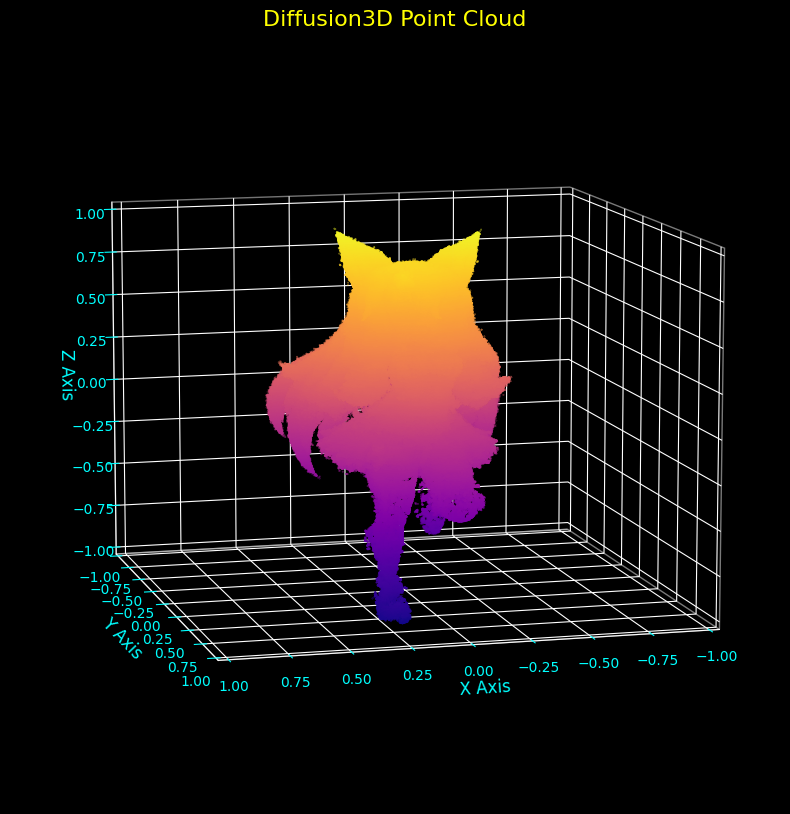

In [15]:
# Load the ply file
def load_ply(path):
    plydata = PlyData.read(path)
    data = plydata.elements[0].data
    points = np.array([list(x) for x in data])
    return points

ply = load_ply('output/catgirl_figure_v2/point_cloud/iteration_5000/point_cloud.ply')

# Display the ply file
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set a dark theme for the plot
plt.style.use('dark_background')

# Create a figure with specified size
fig = plt.figure(figsize=(10, 10))

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with a cool colormap and point size
ax.scatter(ply[:, 0], ply[:, 1], ply[:, 2], c=ply[:, 2], cmap='plasma', s=0.1)

# Setting labels with a cool font
ax.set_xlabel('X Axis', fontsize=12, color='cyan')
ax.set_ylabel('Y Axis', fontsize=12, color='cyan')
ax.set_zlabel('Z Axis', fontsize=12, color='cyan')

ax.tick_params(axis='x', colors='cyan')
ax.tick_params(axis='y', colors='cyan')
ax.tick_params(axis='z', colors='cyan')
ax.set_facecolor('black') 
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

#same range for each axis
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

#rotate camera to face other side of x axis
ax.view_init(10, 75)

# Set a title with a stylish font
ax.set_title('Diffusion3D Point Cloud', fontsize=16, color='yellow')

# Show the plot
plt.show()


In [16]:
def save_obj(path, points):
    with open(path, 'w') as file:
        for point in points:
            file.write(f'v {point[0]} {point[1]} {point[2]}\n')

# Usage
save_obj('output/catgirl_figure_v2/point_cloud/iteration_5000/point_cloud.obj', ply)


In [17]:
import numpy as np
from plyfile import PlyData, PlyElement

def text_to_ply(text_file, ply_file):
    # Load data from text file
    data = np.loadtxt(text_file)

    # Split into coordinates and colors
    xyz, rgb = data[:, :3], data[:, 3:6]
    rgb = np.clip(rgb * 255, 0, 255).astype(np.uint8)  # Assuming RGB is normalized in [0, 1]

    # Prepare the dtype for the structured numpy array
    dtype_full = [
        ('x', 'f4'), ('y', 'f4'), ('z', 'f4'),
        ('red', 'u1'), ('green', 'u1'), ('blue', 'u1')
    ]

    # Prepare the structured array
    elements = np.zeros(xyz.shape[0], dtype=dtype_full)
    for i in range(xyz.shape[0]):
        elements[i] = tuple(xyz[i]) + tuple(rgb[i])

    # Create and write PlyElement
    el = PlyElement.describe(elements, 'vertex')
    PlyData([el]).write(ply_file)

# Example usage
text_to_ply('output/catgirl_figure_v2/point_cloud/iteration_5000/point_cloud_rgb.txt', 'output_color.ply')


In [20]:
import numpy as np
from plyfile import PlyData, PlyElement

def text_to_ply(text_file, ply_file):
    # Load data from text file
    data = np.loadtxt(text_file)

    # Split into coordinates and colors
    xyz, rgb = data[:, :3], data[:, 3:6]
    rgb = np.clip(rgb * 255, 0, 255).astype(np.uint8)  # Scaling to 0-255 range

    # Prepare the dtype for the structured numpy array
    dtype_full = [
        ('x', 'f4'), ('y', 'f4'), ('z', 'f4'),
        ('red', 'u1'), ('green', 'u1'), ('blue', 'u1')
    ]

    # Prepare the structured array
    elements = np.zeros(xyz.shape[0], dtype=dtype_full)
    for i in range(xyz.shape[0]):
        elements[i] = tuple(xyz[i]) + tuple(rgb[i])

    # Create and write PlyElement
    el = PlyElement.describe(elements, 'vertex')
    PlyData([el]).write(ply_file)

# Example usage
text_to_ply('output/catgirl_figure_v2/point_cloud/iteration_5000/point_cloud_rgb.txt', 'output_color2.ply')


In [29]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import numpy as np

def plot_point_cloud(text_file):
    # Load data from text file
    data = np.loadtxt(text_file)

    # Split into coordinates and colors
    xyz, rgb = data[:, :3], data[:, 3:6]

    # Normalize RGB values
    rgb_min = rgb.min(axis=0)
    rgb_max = rgb.max(axis=0)
    rgb = (rgb - rgb_min) / (rgb_max - rgb_min)

    # Plotting
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    #increase alpha to make the points more transparent
    ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=rgb, marker='.')

    # Setting labels with a cool font
    ax.set_xlabel('X Axis', fontsize=12, color='cyan')
    ax.set_ylabel('Y Axis', fontsize=12, color='cyan')
    ax.set_zlabel('Z Axis', fontsize=12, color='cyan')

    ax.tick_params(axis='x', colors='cyan')
    ax.tick_params(axis='y', colors='cyan')
    ax.tick_params(axis='z', colors='cyan')
    ax.set_facecolor('black') 
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    #same range for each axis
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)

    #rotate camera to face other side of x axis
    ax.view_init(10, 75)


    plt.show()
    #save
    plt.savefig('point_cloud_rgb.png')

# Example usage
plot_point_cloud('output/catgirl_figure_v2/point_cloud/iteration_5000/point_cloud_rgb.txt')


/tmp/ipykernel_9355/1004089783.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib

matplotlib.use("Agg")  # Use non-interactive backend to save animations

def plot_point_cloud_animation(text_file, output_file):
    # Load data from text file
    data = np.loadtxt(text_file)

    # Split into coordinates and colors
    xyz, rgb = data[:, :3], data[:, 3:6]

    # Normalize RGB values
    rgb_min = rgb.min(axis=0)
    rgb_max = rgb.max(axis=0)
    rgb = (rgb - rgb_min) / (rgb_max - rgb_min)

    # Plotting
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=rgb, marker='.')

    # Setting labels and style
    ax.set_xlabel('X Axis', fontsize=12, color='cyan')
    ax.set_ylabel('Y Axis', fontsize=12, color='cyan')
    ax.set_zlabel('Z Axis', fontsize=12, color='cyan')

    ax.tick_params(axis='x', colors='cyan')
    ax.tick_params(axis='y', colors='cyan')
    ax.tick_params(axis='z', colors='cyan')
    ax.set_facecolor('black') 
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    # Set the same range for each axis
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)

    # Animation function
    def update(frame):
        ax.view_init(10, frame)
        return scatter,

    # Creating the animation
    ani = FuncAnimation(fig, update, frames=np.arange(0, 180, 2), interval=1, repeat=True)

    # Save the animation
    ani.save(output_file, writer='ffmpeg', fps=20)


plot_point_cloud_animation('output/catgirl_figure_v2/point_cloud/iteration_5000/point_cloud_rgb.txt', 'output_animation3.mp4')


In [ ]:
def load_ply_with_color(path):
    plydata = PlyData.read(path)
    data = plydata.elements[0].data
    points = np.array([(x[0], x[1], x[2], x[3], x[4], x[5]) for x in data], dtype=[
        ('x', 'f4'), ('y', 'f4'), ('z', 'f4'),
        ('red', 'u1'), ('green', 'u1'), ('blue', 'u1')])
    return points

def save_ply_with_color(path, points):
    ply_data = PlyData([PlyElement.describe(points, 'vertex')], text=True)
    ply_data.write(path)

# Usage
ply_with_color = load_ply_with_color('output/bagel/point_cloud/iteration_5000/point_cloud.ply')
save_ply_with_color('output/bagel/point_cloud/iteration_5000/point_cloud_with_color.ply', ply_with_color)


In [23]:
# Load the ply file
def load_ply(path):
    plydata = PlyData.read(path)
    data = plydata.elements[0].data
    # Convert to numpy array and return
    return np.array(data)

ply_data = load_ply('output/bagel/point_cloud/iteration_5000/point_cloud.ply')

# Inspect the first few rows of the data
print(ply_data[:2])

print(ply_data.shape)

# Determine the structure of your ply data
    # def save_ply(self, path):
    #     mkdir_p(os.path.dirname(path))

    #     xyz = self._xyz.detach().cpu().numpy()
    #     normals = np.zeros_like(xyz)
    #     f_dc = self._features_dc.detach().transpose(1, 2).flatten(start_dim=1).contiguous().cpu().numpy()
    #     f_rest = self._features_rest.detach().transpose(1, 2).flatten(start_dim=1).contiguous().cpu().numpy()
    #     opacities = self._opacity.detach().cpu().numpy()
    #     scale = self._scaling.detach().cpu().numpy()
    #     rotation = self._rotation.detach().cpu().numpy()

    #     dtype_full = [(attribute, 'f4') for attribute in self.construct_list_of_attributes()]

    #     elements = np.empty(xyz.shape[0], dtype=dtype_full)
    #     attributes = np.concatenate((xyz, normals, f_dc, f_rest, opacities, scale, rotation), axis=1)
    #     elements[:] = list(map(tuple, attributes))
    #     el = PlyElement.describe(elements, 'vertex')
    #     PlyData([el]).write(path)
    #     np.savetxt(os.path.join(os.path.split(path)[0],"point_cloud_rgb.txt"),np.concatenate((xyz, SH2RGB(f_dc)), axis=1))


[(0.01650851,  0.44887376, 0.05836489, 0., 0., 0., 0.1255182 , 0.08860815,  0.06009381,  0.24880245, -4.921228 , -5.1733723, -5.125466 , 0.9896639, -0.01267019, 0.02156487, -0.0159675 )
 (0.34004855, -0.33406454, 0.21284772, 0., 0., 0., 0.16410923, 0.20543897, -0.09385507, -0.6986378 , -4.6222644, -4.569599 , -4.7721267, 1.0127878,  0.0168026 , 0.00309975,  0.00380718)]
(2680882,)


In [31]:
# Extracting only the x, y, z coordinates
# Convert structured array to a regular 2D numpy array
ply_2d = np.array([list(row) for row in ply_data])

# Now you can extract the x, y, z coordinates
xyz_coordinates = ply_2d[:, :3]

# Continue with the processing...
from plyfile import PlyData, PlyElement

# Create a structured array for the PlyElement
vertex = np.array([(x, y, z) for x, y, z in xyz_coordinates], dtype=[('x', 'f4'), ('y', 'f4'), ('z', 'f4')])

# Create the PlyElement
el = PlyElement.describe(vertex, 'vertex')

# Create the PlyData
PlyData([el]).write('simplified_point_cloud.ply')

